In [1]:
import keras
from keras.datasets import cifar10

(x_train,y_train),(x_test,y_test)=cifar10.load_data()


C:\Users\Lenovo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


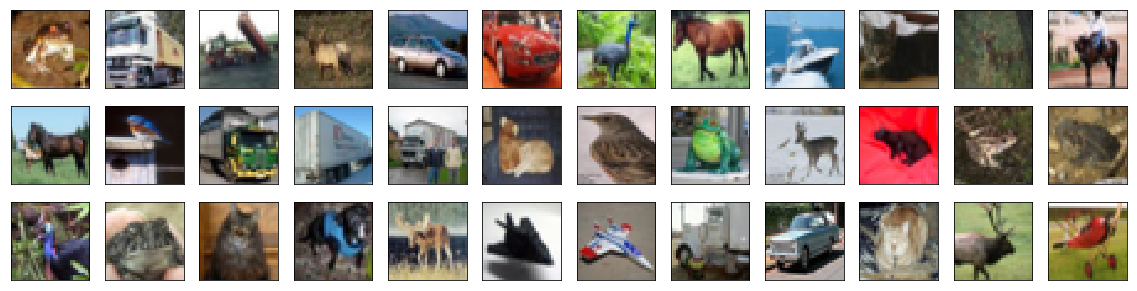

In [2]:
# visualizing first 25 images
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


fig=plt.figure(figsize=(20,5))
for i in range(36):
    ax=fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [3]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [4]:
from keras.utils import np_utils

num_classes=len(np.unique(y_train))
y_train=np_utils.to_categorical(y_train,num_classes)
y_test=np_utils.to_categorical(y_test,num_classes)


#breaking into validaton sets

(x_train,x_valid)=x_train[5000:],x_train[:5000]
(y_train,y_valid)=y_train[5000:],y_train[:5000]

print("Shape of train set :{}".format(x_train.shape))
print("Count of training set : {}".format(len(x_train)))
print("Count of testing set : {}".format(len(x_test)))
print("Count of Validation set : {}".format(len(x_valid)))

Shape of train set :(45000, 32, 32, 3)
Count of training set : 45000
Count of testing set : 10000
Count of Validation set : 5000


In [5]:
#ModelCNN
from keras.models import Sequential
from keras.layers import MaxPooling2D,Conv2D,Flatten,Dense,Dropout

model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

In [6]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [8]:
from keras.callbacks import ModelCheckpoint
checkpoint=ModelCheckpoint(filepath='cnn.cifar.best.hdf5')
hist=model.fit(x_train,y_train,batch_size=32,epochs=100,validation_data=(x_valid,y_valid),callbacks=[checkpoint],verbose=2,shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 42s - loss: 1.5684 - acc: 0.4328 - val_loss: 1.6020 - val_acc: 0.4244
Epoch 2/100
 - 41s - loss: 1.2445 - acc: 0.5564 - val_loss: 1.5519 - val_acc: 0.4876
Epoch 3/100
 - 42s - loss: 1.1233 - acc: 0.6024 - val_loss: 1.0174 - val_acc: 0.6534
Epoch 4/100
 - 41s - loss: 1.0528 - acc: 0.6300 - val_loss: 1.0655 - val_acc: 0.6374
Epoch 5/100
 - 41s - loss: 1.0121 - acc: 0.6476 - val_loss: 1.0465 - val_acc: 0.6420
Epoch 6/100
 - 42s - loss: 0.9841 - acc: 0.6549 - val_loss: 0.9245 - val_acc: 0.6754
Epoch 7/100
 - 41s - loss: 0.9633 - acc: 0.6668 - val_loss: 1.0691 - val_acc: 0.6252
Epoch 8/100
 - 41s - loss: 0.9529 - acc: 0.6750 - val_loss: 0.9650 - val_acc: 0.6666
Epoch 9/100
 - 42s - loss: 0.9544 - acc: 0.6754 - val_loss: 0.9378 - val_acc: 0.6854
Epoch 10/100
 - 41s - loss: 0.9478 - acc: 0.6759 - val_loss: 0.9220 - val_acc: 0.6886
Epoch 11/100
 - 41s - loss: 0.9478 - acc: 0.6790 - val_loss: 0.9573 - val_acc: 0.6760
Epoch 12/100
 

Epoch 96/100
 - 47s - loss: 1.7600 - acc: 0.3775 - val_loss: 1.5841 - val_acc: 0.4116
Epoch 97/100
 - 47s - loss: 1.7706 - acc: 0.3774 - val_loss: 2.6916 - val_acc: 0.2102
Epoch 98/100
 - 42s - loss: 1.7656 - acc: 0.3756 - val_loss: 1.6379 - val_acc: 0.4142
Epoch 99/100
 - 51s - loss: 1.7713 - acc: 0.3685 - val_loss: 1.5863 - val_acc: 0.4204
Epoch 100/100
 - 48s - loss: 1.7795 - acc: 0.3664 - val_loss: 1.9645 - val_acc: 0.2430


In [9]:
model.load_weights('cnn.cifar.best.hdf5')
#Evaluate
score=model.evaluate(x_test,y_test,verbose=0)
print('\n','Test accuracy :',score[1]
     )


 Test accuracy : 0.2441


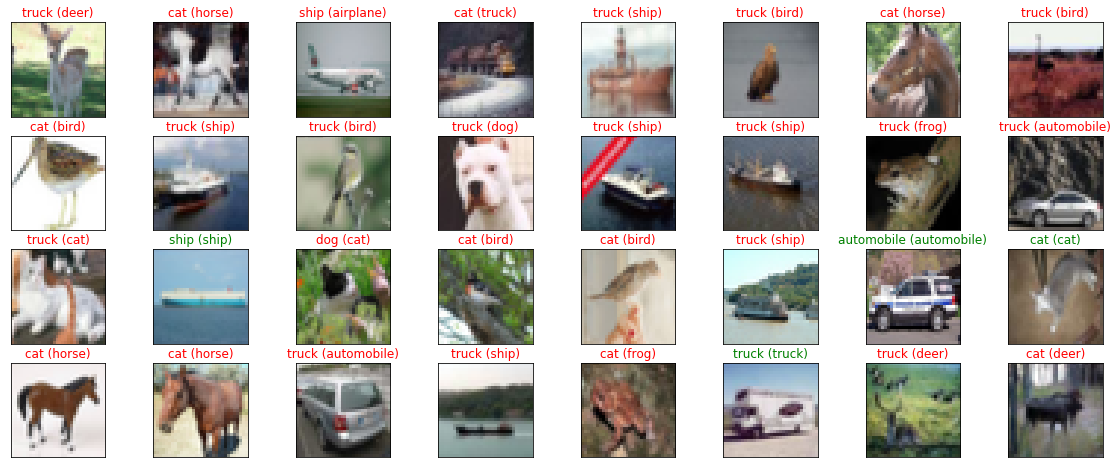

In [11]:
#Visualizing some predictions
y_hat=model.predict(x_test)
cifar10_labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


fig=plt.figure(figsize=(20,8))
for i ,idx in enumerate(np.random.choice(x_test.shape[0],size=32,replace=False)):
    ax=fig.add_subplot(4,8,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx=np.argmax(y_hat[idx])
    true_idx=np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx],cifar10_labels[true_idx]),color=('green' if pred_idx ==true_idx else 'red'))